In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import random
from timeit import default_timer as timer
import random
from sklearn import preprocessing
import tqdm

In [50]:
def quantilerank(xs):
    ranks = scipy.stats.rankdata(xs, method='average')
    quantile_ranks = [scipy.stats.percentileofscore(ranks, rank, kind='weak') for rank in ranks]
    return np.array(quantile_ranks)

In [51]:
arr = pd.read_csv("phylo.csv",
                 delimiter=",")
ex_data = arr[["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"]]

In [53]:
ex_tr = ex_data.apply(lambda row: quantilerank(row))

In [54]:
ex_data = ex_tr

In [55]:
arr["Phylostratum"] = quantilerank(arr["Phylostratum"])

In [56]:

age_weighted = ex_data.mul(arr["Phylostratum"], axis=0).to_numpy()
ex_data_n = ex_data.to_numpy()

In [57]:
def print_curve(solution,label=None,num=1):
    up = solution.dot(age_weighted)
    down = solution.dot(ex_data_n)
    avgs = np.divide(up,down)
    print(np.var(avgs))
    plt.figure(num)
    plt.ylim(57.5, 60)
    plt.plot(["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"], avgs, lw=3)
    plt.xlabel("Stage")
    plt.ylabel("TAI")
    if label:
        plt.legend()


0.05013048534002039


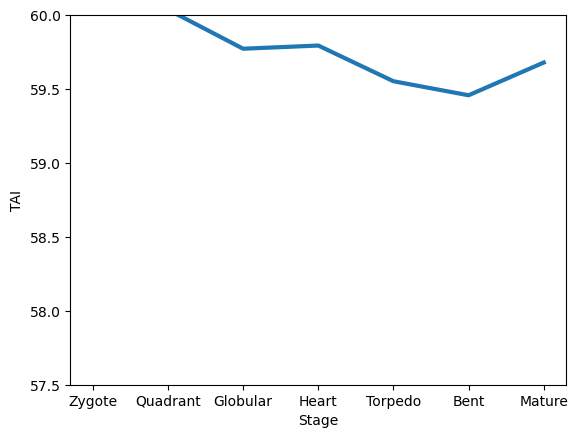

In [45]:
print_curve(np.ones(arr.shape[0]))

Text(0, 0.5, 'TAI')

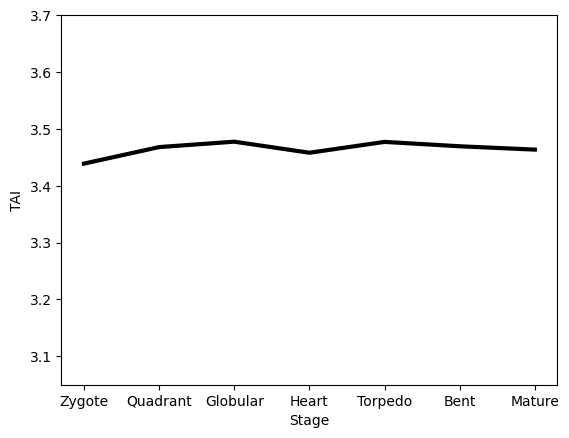

In [83]:
phil = arr['Phylostratum']
perm = np.random.permutation(phil)
weighted = ex_data.mul(perm, axis=0)
avgs = weighted.sum(axis=0)/ex_data.sum(axis=0)
plt.ylim(3.05, 3.7)
plt.plot(["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"], avgs, lw=3,c="Black")
plt.xlabel("Stage")
plt.ylabel("TAI")

In [77]:
best_sols = pd.read_csv("best_solutions.csv",
                 delimiter=",",header=None).to_numpy()

In [5]:
best_sols.shape


(2, 25260)

In [434]:
fitness = fitness_funct(best_sols)

In [483]:
col = [150 if x == max(fitness) else 40 for x in fitness]


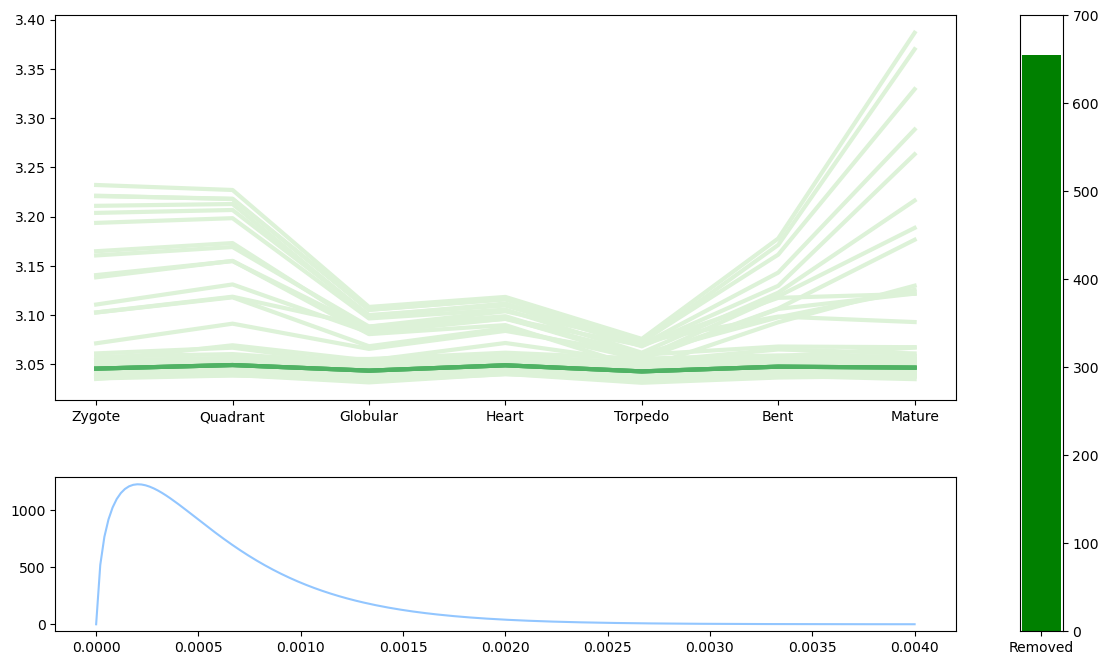

In [527]:
plt.style.use('seaborn-v0_8-pastel')
fig11 =plt.figure(figsize=(13, 8))
x = np.linspace (0, 0.004, 300) 

#calculate pdf of Gamma distribution for each x-value
y = gamma.pdf(x)

#create plot of Gamma distribution


grid = fig11.add_gridspec(3, 10, wspace=1.5, hspace=0.5)
ax1 = plt.subplot(grid[:2, :-1])
ax2 = plt.subplot(grid[:, -1])
ax3 = plt.subplot(grid[2, :-1])
for sol,f in zip(avgs_batch(best_sols),col):
    ax1.plot(["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"], sol, lw=3,c=plt.cm.Greens(f))
ax2.bar(["Removed"], max(best_sols.shape[1] - np.sum(best_sols,axis = 1)),color="Green")
ax2.set_ylim([0, 700])
ax2.yaxis.tick_right()
ax3.plot(x, y)


In [498]:
def plot(num):

    fitness = fitness_funct(best_sols)
    col = [150 if x == max(fitness) else 40 for x in fitness]

    plt.style.use('seaborn-v0_8-pastel')
    plt.figure(num)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 8),gridspec_kw={'width_ratios': [13, 1]})

    for sol,f in zip(avgs_batch(best_sols),col):
        ax1.plot(["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"], sol, lw=3,c=plt.cm.Greens(f))
    ax2.bar(["Removed"], max(best_sols.shape[1] - np.sum(best_sols,axis = 1)),color="Green")
    ax2.set_ylim([0, 700])
    ax2.yaxis.tick_right()
    plt.savefig("./test" + str(num) + ".png")
    plt.close()

In [499]:
for x in range(2):
    plot(x)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:

for i,sol in enumerate(best_sols):
    print_curve(sol,num=i)

In [58]:
phil = arr['Phylostratum']
variances = []
print("Running permuations")
for _ in tqdm.trange(100000):
    perm = np.random.permutation(phil)
    weighted = ex_data.mul(perm, axis=0)
    avg = weighted.sum(axis=0)/ex_data.sum(axis=0)
    variances.append(np.var(avg))
shape, loc, scale = scipy.stats.gamma.fit(variances)

Running permuations


100%|██████████| 100000/100000 [06:56<00:00, 240.22it/s]


In [81]:
gamma = scipy.stats.gamma(1.5114422884072107, scale=0.0003905211020188656,loc=5.369238206226383e-06)

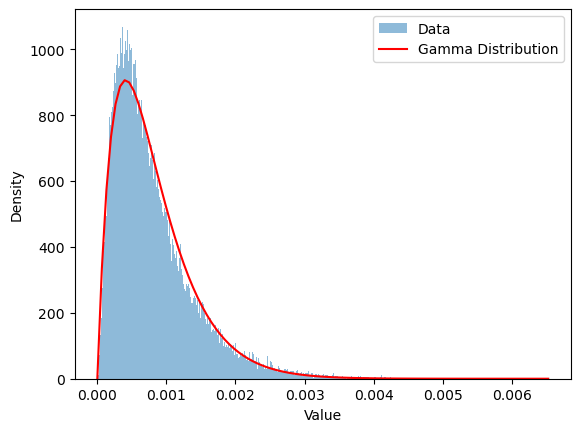

Goodness-of-Fit Test Results:
Kolmogorov-Smirnov (KS) test p-value: 3.135977087896815e-53


In [59]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load your data (replace with your actual data)
data = variances

# Fit the data to a gamma distribution
shape, loc, scale = stats.gamma.fit(data, floc=0)

# Generate the theoretical gamma distribution
gamma_dist = stats.gamma(shape, loc=loc, scale=scale)

# Plot histogram of the data
plt.hist(data, bins=1000, density=True, alpha=0.5, label='Data')

# Plot the theoretical gamma distribution
x = np.linspace(0, np.max(data), 100)
plt.plot(x, gamma_dist.pdf(x), 'r-', label='Gamma Distribution')

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform a goodness-of-fit test
kstest_result = stats.kstest(data, gamma_dist.cdf)

print("Goodness-of-Fit Test Results:")
print("Kolmogorov-Smirnov (KS) test p-value:", kstest_result.pvalue)


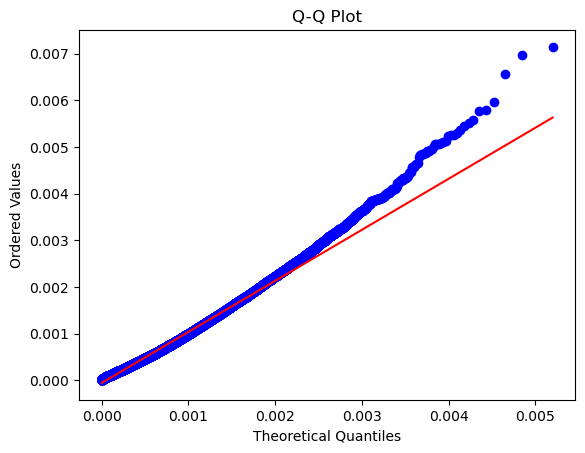

In [92]:
stats.probplot(data, dist=gamma_dist, plot=plt)

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot')
plt.show()

In [31]:
def get_sol_from_indices(indices):
    ones = np.ones(arr.shape[0])
    ones[indices] = 0
    return ones

In [7]:
def get_tai_var(solutions):
    up = solutions.dot(age_weighted)
    down = solutions.dot(ex_data_n)
    avgs = np.divide(up,down)
    return np.var(avgs,axis=1)

def get_p_value(solutions):
    return  1 - np.array(gamma.cdf(get_tai_var(solutions)))
    
def fitness_funct(solutions):
    num_not_removed = np.sum(solutions,axis = 1)
    num_removed = solutions.shape[1]- num_not_removed
    fitness = get_p_value(solutions) 
    fitness = fitness + 5*(fitness * (1 - num_removed/solutions.shape[1]))
    return fitness

In [8]:
def avgs_batch(solutions):
    up = solutions.dot(age_weighted)
    down = solutions.dot(ex_data_n)
    return np.divide(up,down)
    

In [9]:
df = pd.DataFrame(data = avgs_batch(best_sols), 
                  columns = ["Zygote", "Quadrant","Globular","Heart","Torpedo","Bent","Mature"],
                  index = fitness_funct(best_sols))
df.index.name="fitness"

NameError: name 'gamma' is not defined

In [10]:
def tai_var(solution):
    up = solution.dot(age_weighted)
    down = solution.dot(ex_data_n)
    avgs = np.divide(up,down)
    return np.var(avgs)

In [12]:
def p_value_test(solution):
    return  1 - np.array(gamma.cdf(tai_var(solution)))

In [46]:
sols2 = pd.read_csv("best_solutions.csv",
                 delimiter=",",header=None).to_numpy()

In [49]:
len(np.where(np.logical_and(sols[0] == 0,sols2[0] == 0))[0])

112

In [18]:
gamma = scipy.stats.gamma(0.16114080012196816, scale=0.003763919999917581,loc=1.369238206226383e-06)

In [22]:
def get_tai_var(solutions):
    up = solutions.dot(age_weighted)
    down = solutions.dot(ex_data_n)
    avgs = np.divide(up,down)
    return np.var(avgs,axis=1)

def get_var_and_p_single(self,solution):

    up = solution.dot(self.expression_data.age_weighted)
    down = solution.dot(self.expression_data.expressions_n)
    avgs = np.divide(up,down)
    varr = np.var(avgs)
    return varr,  1 - np.array(self.gamma.cdf(varr))

def get_p_value(solutions):
    return  1 - np.array(gamma.cdf(get_tai_var(solutions)))
    
def fitness_funct(solutions):
    num_not_removed = np.sum(solutions,axis = 1)
    num_removed = solutions.shape[1] - num_not_removed
    fitness = get_p_value(solutions) 
    return fitness + 5*(fitness * (1 - num_removed/solutions.shape[1]))

In [19]:
sols.shape

(2011, 25260)

In [23]:
fitness = fitness_funct(sols)

In [31]:
best_ind = np.argsort(fitness)[-200:]

In [11]:
sols[best_ind].shape

(15, 25260)

In [26]:
get_removed_genes_from_solution(sols[0])["GeneID"]

4        at1g01090.1
23       at1g01620.1
62       at1g02560.1
131      at1g04270.1
140      at1g04480.1
            ...     
25132    at5g50600.1
25136    at5g50700.1
25153    at5g54380.1
25169    at5g56580.1
25259    at5g67600.1
Name: GeneID, Length: 214, dtype: object

In [27]:
summed = sols.sum(axis=0)

In [28]:
summed

array([2011., 2011., 2011., ..., 2011., 2011.,    0.])

In [29]:
len(np.where(summed <= 0)[0])

209

7.540851154231588e-05


NameError: name 'p_value_test' is not defined

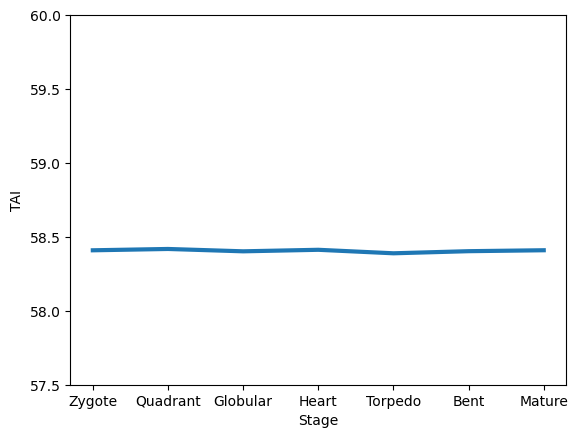

In [41]:
sol = get_sol_from_indices(np.where(summed <= 2)[0])
#print_curve(np.ones_like(sol) - sol)
print_curve(sol)
p_value_test(sol)

In [ ]:
flat_line_test_g_dist(arr,10000000)

100%|██████████| 10000000/10000000 [10:44:17<00:00, 258.68it/s] 


0.12894787508926014
1.4138591772680575
6.088829427981213e-07


In [36]:
combs = list(combinations(range(sols.shape[0]), 2))

In [37]:
sims = np.zeros((sols.shape[0],sols.shape[0]))

In [38]:
for combination in combs:
    sims[combination[0],combination[1]] = (max(sum(sols[combination[0]]), sum(sols[combination[1]]))) - (sols[combination[0]] @ sols[combination[1]]) 

KeyboardInterrupt: 

In [21]:
sims

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [25]:
def get_removed_genes_from_solution(solution):
    return arr.iloc[arr.index.values[np.where(solution == 0)[0]],:]

In [54]:
rem = get_removed_genes_from_solution(sol)

In [71]:
def get_ex_hist(removed_genes):
    variances = removed_genes.iloc[:, 2:].var(axis=1)
    variances_df = pd.DataFrame(data={'removed': variances, 'removed_cv': variances/removed_genes.iloc[:, 2:].mean(axis=1),'all': ex_data.var(axis=1),'all_cv': ex_data.var(axis=1)/ex_data.mean(axis=1)})
    sns.histplot(data=variances_df,x="removed",stat="density",binrange=(0,10000000),fill=False,common_norm=False,bins=30,label="removed")
    sns.histplot(data=variances_df,x="all",stat="density",binrange=(0,10000000),fill=False,common_norm=False,bins=30,label="all")
    plt.legend()

/var/folders/pw/r8s9dk9x4z56sfjh5qm3t8gw0002n8/T/ipykernel_11258/943942999.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = removed_genes.iloc[:, 2:].var(axis=1)
/var/folders/pw/r8s9dk9x4z56sfjh5qm3t8gw0002n8/T/ipykernel_11258/943942999.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances_df = pd.DataFrame(data={'removed': variances, 'removed_cv': variances/removed_genes.iloc[:, 2:].mean(axis=1),'all': ex_data.var(axis=1),'all_cv': ex_data.var(axis=1)/ex_data.mean(axis=1)})


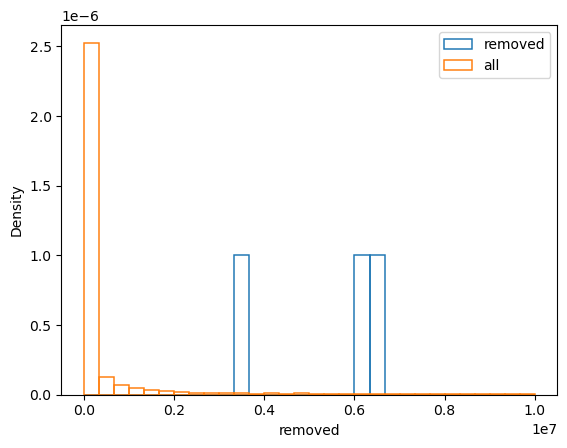

In [72]:
get_ex_hist(rem)

In [74]:
25000/150

166.66666666666666

In [98]:
random.getrandbits(3)

0

In [327]:


start = timer()
out = np.zeros((2500,25000)).dot(np.random.rand(25000,10))
end = timer()
print(end - start)

0.5635404780041426


In [319]:
out.shape

(2500, 10)

In [336]:

start = timer()
np.ones((2500,25000)).dot(np.random.rand(25000,10))
end = timer()
print(end - start)

0.46435385500080884


In [210]:
randomlist

[19164, 20831, 3494, 22937, 17597, 16020, 16653, 15493]

In [328]:
zeros = np.zeros((25000,2500))

In [330]:
 (zeros + 1) % 2

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [334]:
np.where(zeros == 0,1,0)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [276]:
start = timer()
np.random.random(size=self.parents.shape[0])
end = timer()
print(end - start)

0.00010802806355059147


In [212]:
a = np.ones(10000)

In [226]:

start = timer()
random.shuffle(a)
end = timer()
print(end - start)

0.014388682902790606


In [232]:
random.sample(range(7), k=25000)

ValueError: Sample larger than population or is negative

In [229]:

start = timer()
np.random.permutation(a)
end = timer()
print(end - start)

0.0005624620243906975
